<a href="https://colab.research.google.com/github/sebascastellanos/Analitica1/blob/main/Proyectin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = "/content/drive/MyDrive/6to Semestre/Analitica/2do Corte/Telco-Customer-Churn-V2.csv"

In [ ]:
import pandas as pd

df = pd.read_csv(ruta)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.0,No,'No phone service',DSL,No,Yes,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,Male,No,No,No,45.0,No,'No phone service',DSL,Yes,No,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,Female,No,No,No,2.0,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


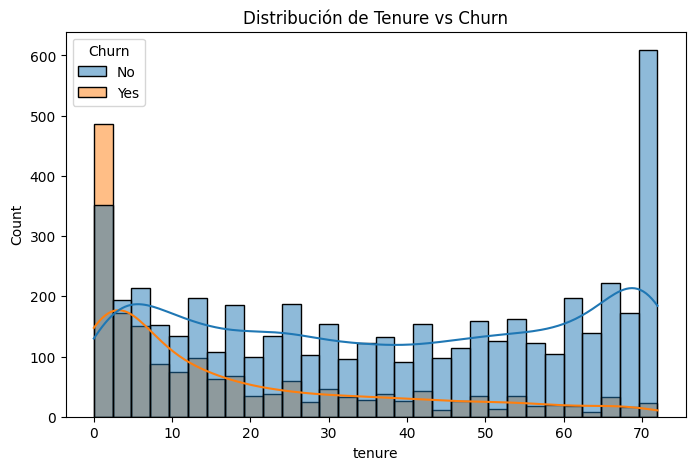

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, bins=30)
plt.title("Distribución de Tenure vs Churn")
plt.show()

<ipython-input-19-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-19-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-19-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-19-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-19-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

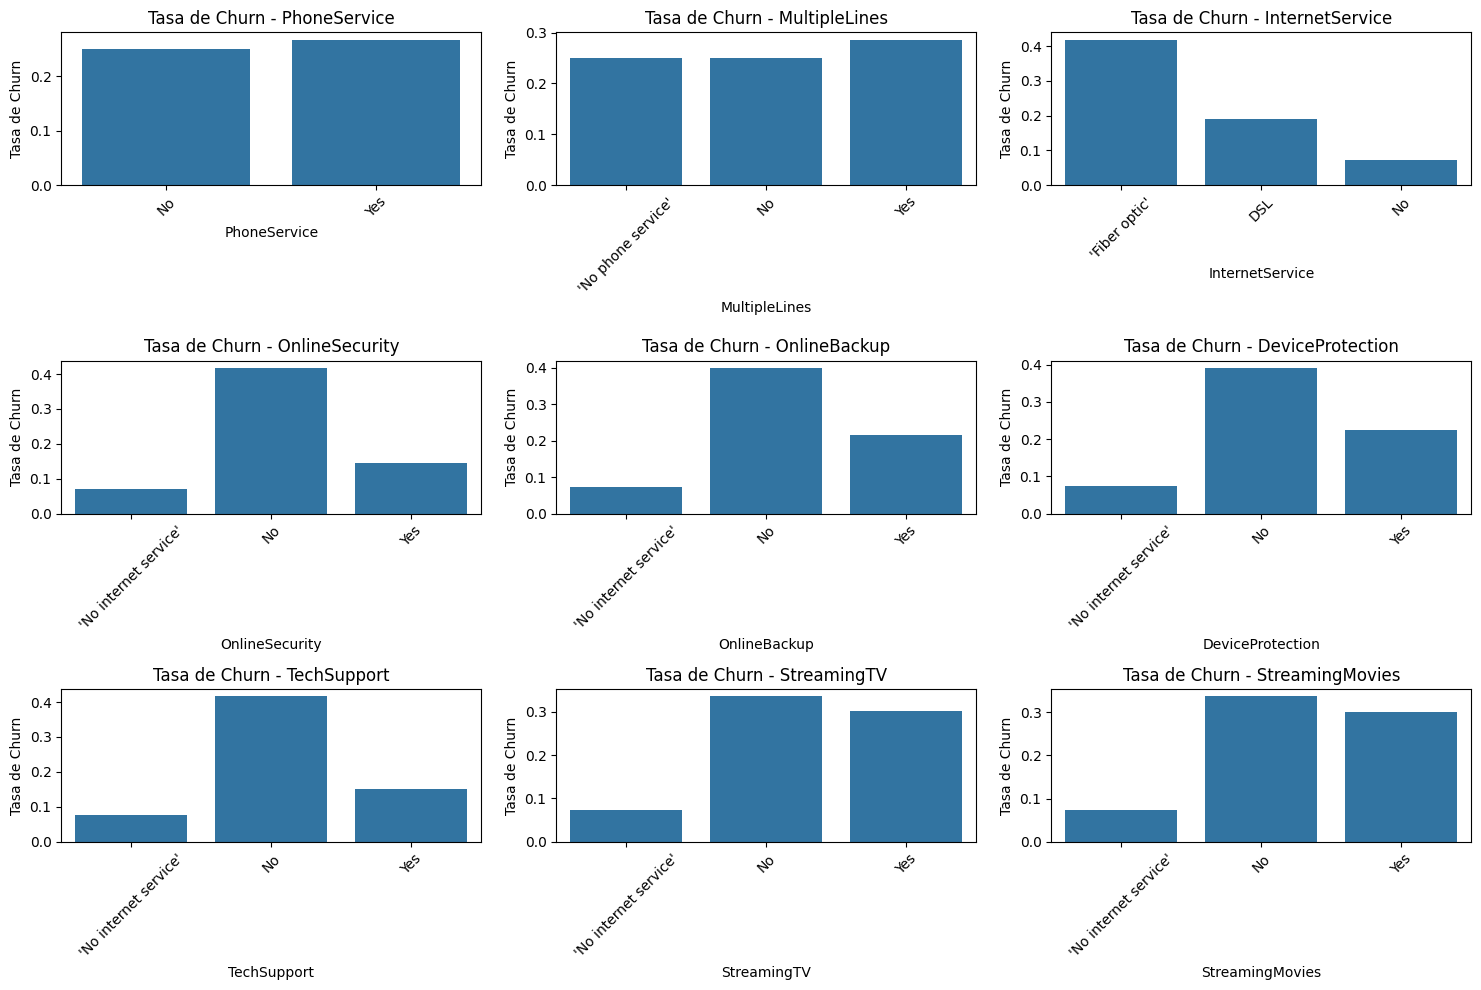

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir Churn a valores numéricos (Yes=1, No=0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Seleccionar columnas de servicio
service_columns = [
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

# Calcular tasa de abandono por servicio
churn_rates = {service: df.groupby(service)["Churn"].mean() for service in service_columns}

# Graficar cada categoría de servicio
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (service, churn_rate) in zip(axes, churn_rates.items()):
    sns.barplot(x=churn_rate.index, y=churn_rate.values, ax=ax)
    ax.set_title(f"Tasa de Churn - {service}")
    ax.set_ylabel("Tasa de Churn")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
